In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('car.csv')  # Replace with your dataset path

# Inspect the first few rows
print(data.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [4]:
print(data.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [5]:
# Fill missing values (optional based on your data)
data.fillna(method='ffill', inplace=True)

# Define the feature columns and the target variable
features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission']
target = 'selling_price'

X = data[features]
y = data[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and test sets
X_train.shape, X_test.shape


C:\Users\Main Profile\AppData\Local\Temp\ipykernel_6568\287062732.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


((3472, 5), (868, 5))

In [6]:
# Preprocessing for numerical features
numerical_features = ['year', 'km_driven']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Impute missing values
    ('scaler', StandardScaler())  # Scale numerical features
])

# Preprocessing for categorical features
categorical_features = ['fuel', 'seller_type', 'transmission']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
])

# Combine the numerical and categorical transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [7]:
# Create a pipeline combining preprocessing and a RandomForest regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)


In [8]:
# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 157485279903.1416
R-squared: 0.4839429424019782


In [9]:
# Define the parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees in forest
    'regressor__max_depth': [10, 20, None],  # Max depth of each tree
    'regressor__min_samples_split': [2, 5, 10]  # Min samples required to split an internal node
}

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Show the best parameters from GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')

# Get the best model and make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model R-squared: {r2_best}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Best Model Mean Squared Error: 155083023096.94196
Best Model R-squared: 0.49181479924958116


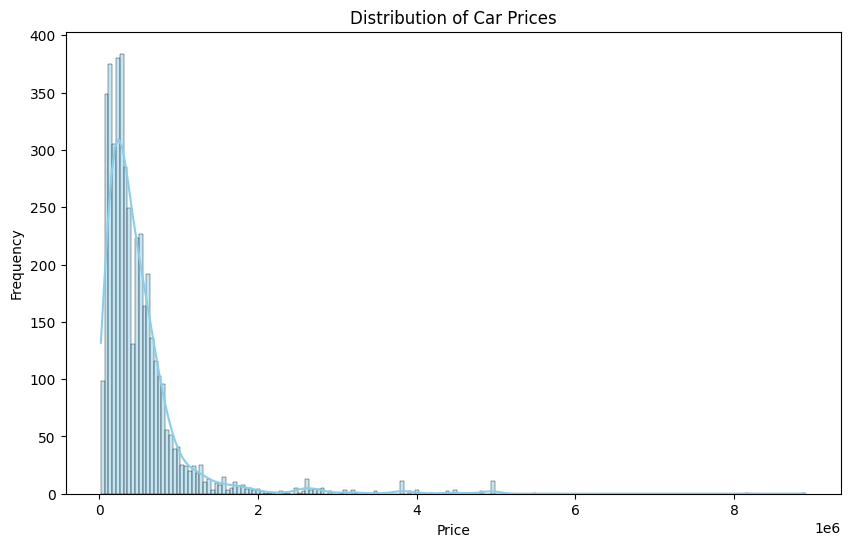

In [10]:
# Visualize the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


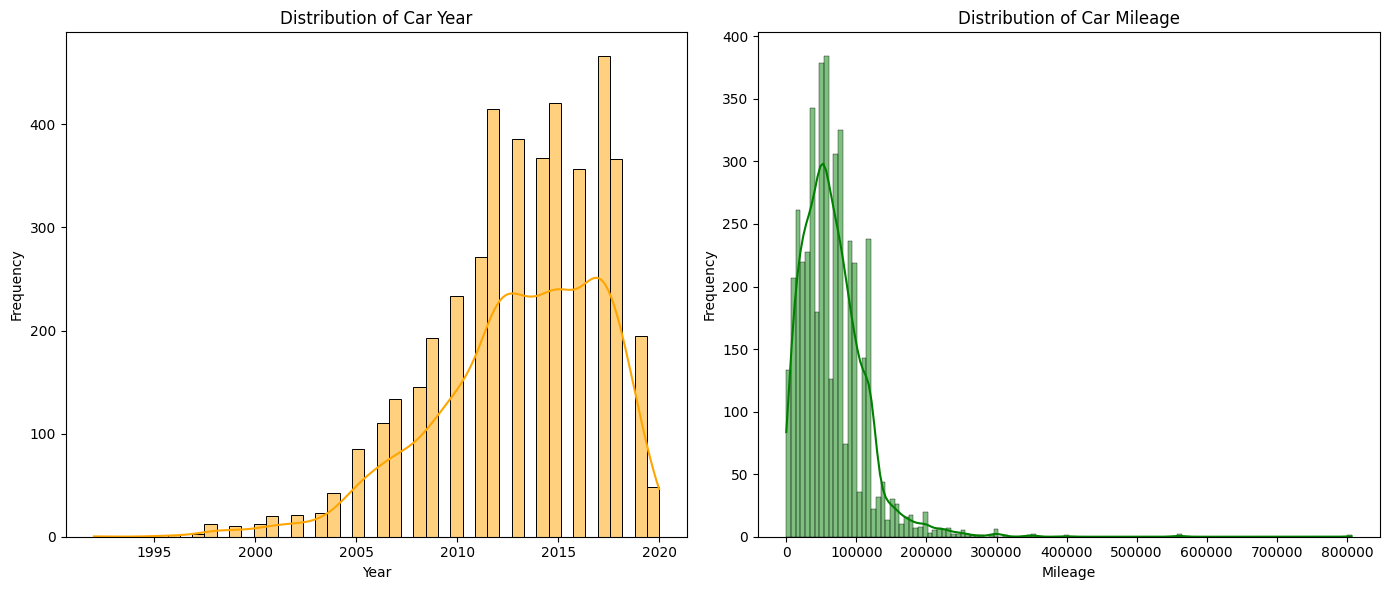

In [11]:
# Visualizing the distribution of 'Year' and 'Mileage' features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Year distribution
sns.histplot(data['year'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Distribution of Car Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

# Mileage distribution
sns.histplot(data['km_driven'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Car Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\Main Profile\AppData\Local\Temp\ipykernel_6568\286730145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=data, ax=axes[0], palette='Set2')
C:\Users\Main Profile\AppData\Local\Temp\ipykernel_6568\286730145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=data, ax=axes[1], palette='Set3')


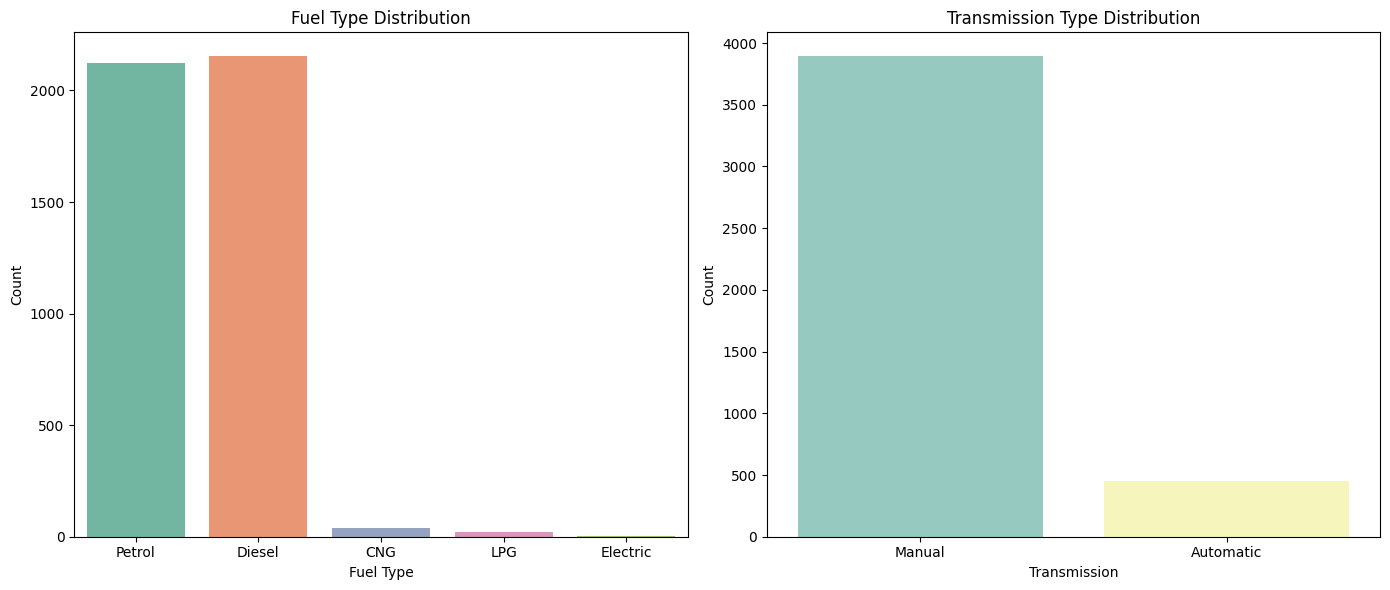

In [12]:
# Visualize categorical features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fuel type distribution
sns.countplot(x='fuel', data=data, ax=axes[0], palette='Set2')
axes[0].set_title('Fuel Type Distribution')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Count')

# Transmission distribution
sns.countplot(x='transmission', data=data, ax=axes[1], palette='Set3')
axes[1].set_title('Transmission Type Distribution')
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


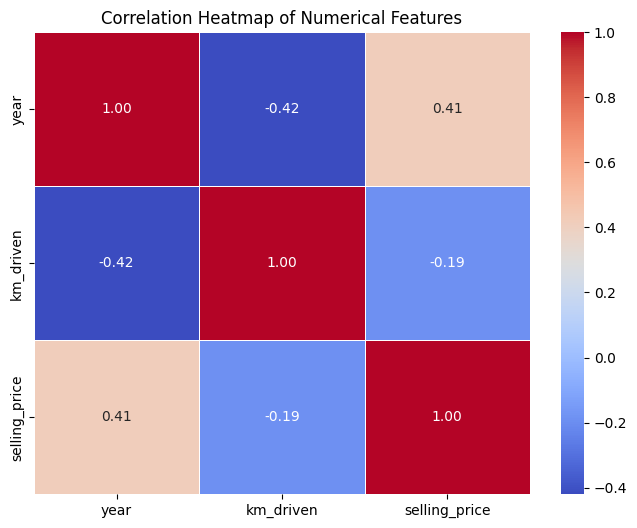

In [13]:
# Compute the correlation matrix for numerical features
correlation_matrix = data[['year', 'km_driven', 'selling_price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


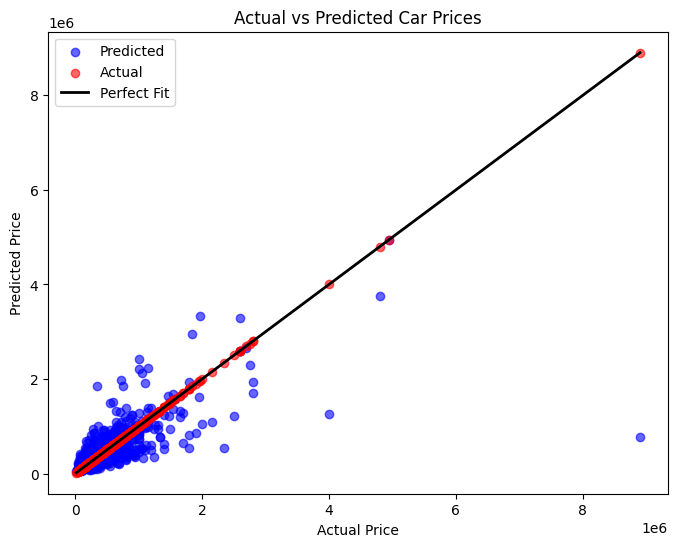

In [14]:
# Visualize the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.6)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()


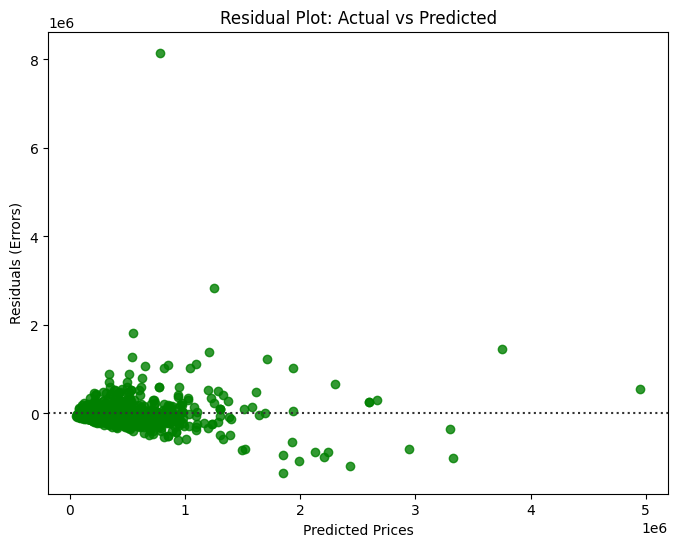

In [15]:
# Calculate residuals
residuals = y_test - y_pred

# Visualize residuals without lowess
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot: Actual vs Predicted')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.show()


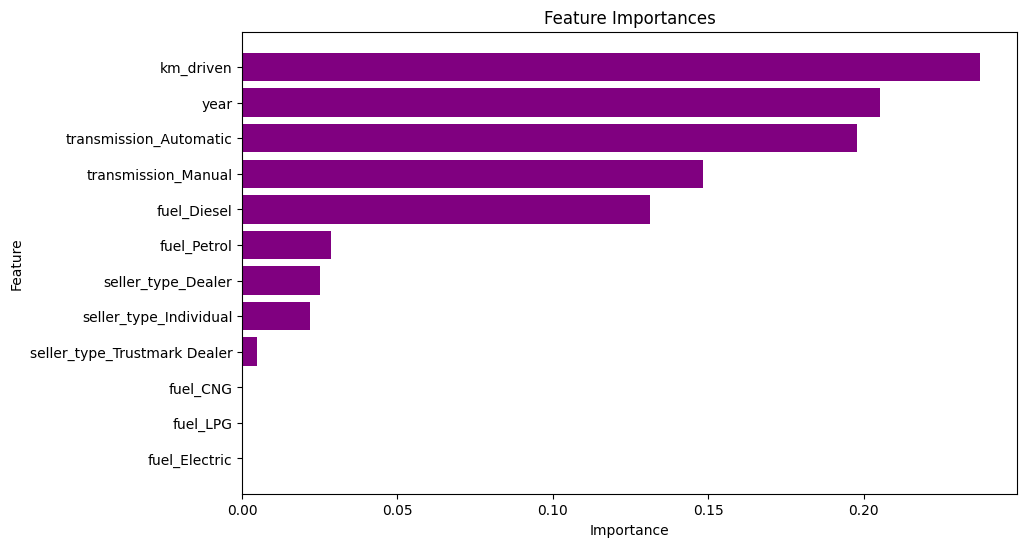

In [16]:
# Plot the feature importances
feature_importances = best_model.named_steps['regressor'].feature_importances_
features_names = numerical_features + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

# Sort features by importance
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features_names)[sorted_idx], feature_importances[sorted_idx], color='purple')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


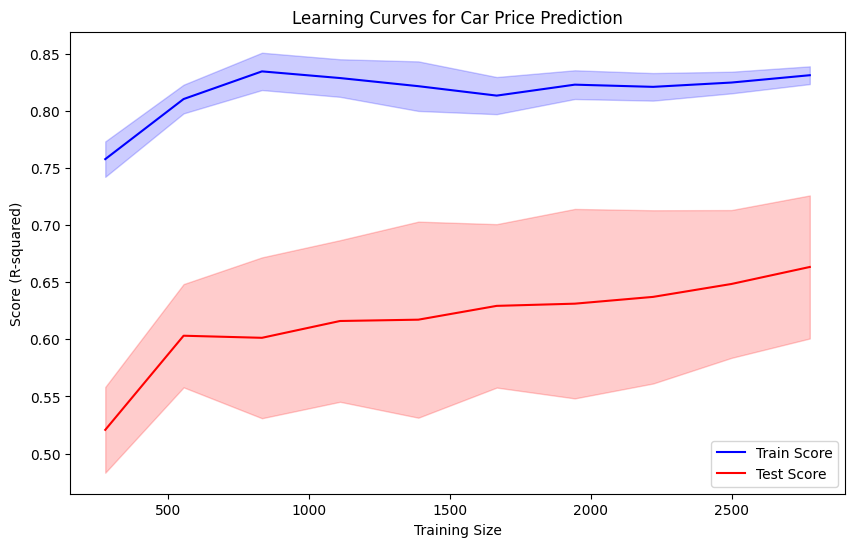

In [17]:
from sklearn.model_selection import learning_curve

# Learning curve for Random Forest regressor
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Score', color='blue')
plt.plot(train_sizes, test_mean, label='Test Score', color='red')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Learning Curves for Car Price Prediction')
plt.xlabel('Training Size')
plt.ylabel('Score (R-squared)')
plt.legend(loc='best')
plt.show()


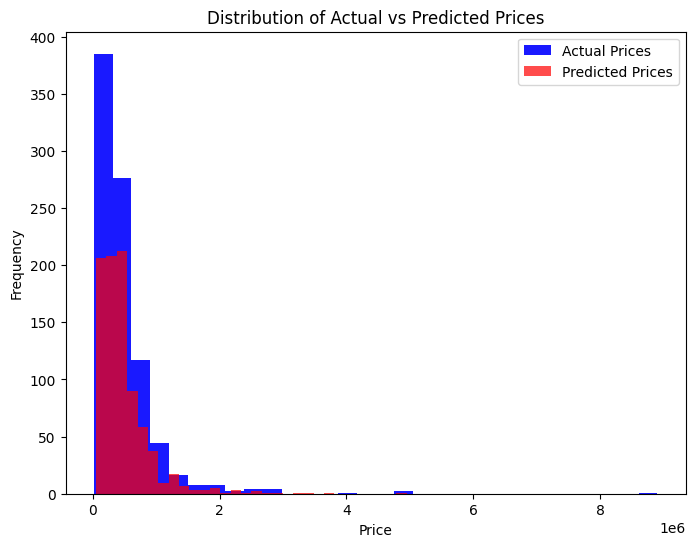

In [18]:
# Histogram of Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.9, label='Actual Prices', color='blue')
plt.hist(y_pred, bins=30, alpha=0.7, label='Predicted Prices', color='red')
plt.legend()
plt.title('Distribution of Actual vs Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


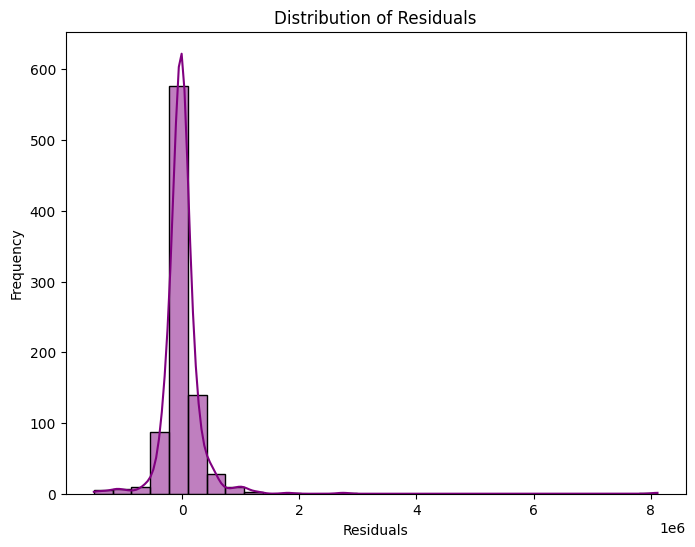

In [19]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


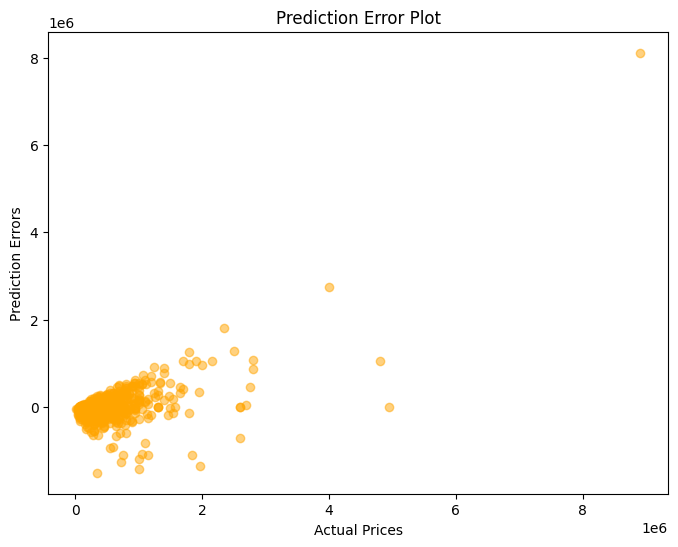

In [20]:
# Plot the error (Actual - Predicted) for each data point
plt.figure(figsize=(8, 6))
errors = y_test - y_pred
plt.scatter(y_test, errors, alpha=0.5, color='orange')
plt.title('Prediction Error Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Prediction Errors')
plt.show()


C:\Users\Main Profile\AppData\Local\Temp\ipykernel_6568\8956605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['fuel'], y=data['selling_price'], palette='Set2')


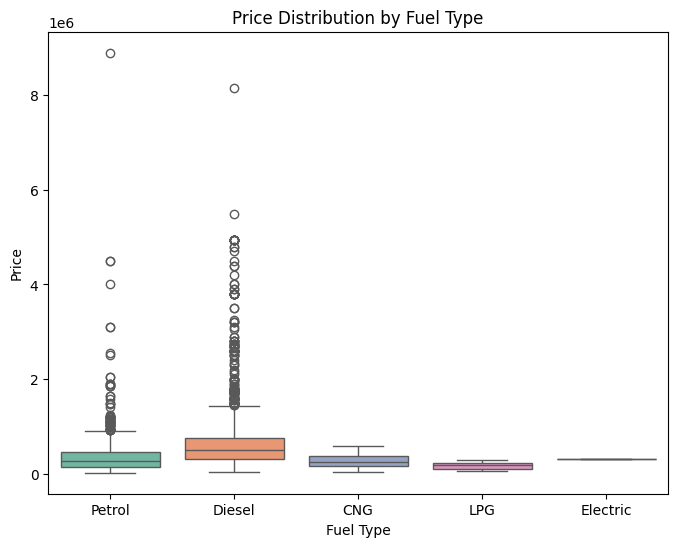

In [21]:
# Boxplot of car prices by fuel type
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['fuel'], y=data['selling_price'], palette='Set2')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


C:\Users\Main Profile\AppData\Local\Temp\ipykernel_6568\272719991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['transmission'], y=data['selling_price'], palette='Set3')


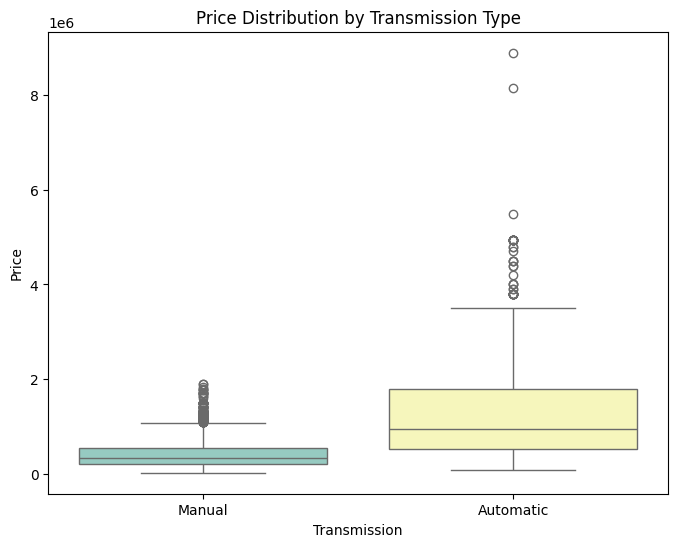

In [22]:
# Boxplot of car prices by transmission type
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['transmission'], y=data['selling_price'], palette='Set3')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()


In [25]:
import joblib

# Function to preprocess input data
def preprocess_input(name, year, km_driven, fuel, seller_type, transmission, owner, training_columns):
    """
    Prepares the input data for prediction by performing feature engineering 
    and ensuring alignment with training feature names.
    """
    # Calculate car age
    car_age = 2024 - year

    # One-hot encoding simulation
    fuel_options = ['Diesel', 'Electric', 'LPG', 'Petrol']
    seller_options = ['Dealer', 'Individual', 'Trustmark Dealer']
    transmission_options = ['Manual']
    owner_options = ['First Owner', 'Second Owner']  # Only two owner types

    # Create a dictionary for new data
    new_data = {
        'km_driven': [km_driven],
        'car_age': [car_age],
    }

    # Dynamically populate one-hot encoded fields
    for option in fuel_options:
        new_data[f'fuel_{option}'] = [1 if fuel == option else 0]

    for option in seller_options:
        new_data[f'seller_type_{option}'] = [1 if seller_type == option else 0]

    for option in transmission_options:
        new_data[f'transmission_{option}'] = [1 if transmission == option else 0]

    for option in owner_options:
        new_data[f'owner_{option}'] = [1 if owner == option else 0]

    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame(new_data)

    # Align the columns with the training set
    input_df = input_df.reindex(columns=training_columns, fill_value=0)
    return input_df

# Load the model
def load_model(model_path='car_price_prediction_model.pkl'):
    """
    Loads the trained model from the specified file path.
    """
    return joblib.load(model_path)

# Predict price
def predict_price():
    """
    Collects user input, preprocesses it, and predicts the car price.
    """
    # Load the trained model
    model = load_model()

    # Get the feature names used during training
    training_columns = model.feature_names_in_

    # Get user input
    print("Enter the details of the car for price prediction:")

    name = input("Car Name: ").strip()  # This is not used in prediction
    year = int(input("Year of Manufacture: "))
    km_driven = int(input("Kilometers Driven: "))
    fuel = input("Fuel Type (Petrol/Diesel/Electric/LPG): ").strip()
    seller_type = input("Seller Type (Dealer/Individual/Trustmark Dealer): ").strip()
    transmission = input("Transmission Type (Manual/Automatic): ").strip()
    owner = input("Owner Type (First Owner/Second Owner): ").strip()

    # Preprocess the input
    input_data = preprocess_input(name, year, km_driven, fuel, seller_type, transmission, owner, training_columns)

    # Predict the price
    predicted_price = model.predict(input_data)[0]
    print("\nPredicted Price for the car: {:.2f}".format(predicted_price))

# Call the function to predict price
predict_price()


Enter the details of the car for price prediction:
Car Name: Maruti Wagon
Year of Manufacture: 2007
Kilometers Driven: 135000
Fuel Type (Petrol/Diesel/Electric/LPG): Petrol
Seller Type (Dealer/Individual/Trustmark Dealer): Individual
Transmission Type (Manual/Automatic): Manual
Owner Type (First Owner/Second Owner): First Owner

Predicted Price for the car: 127700.00


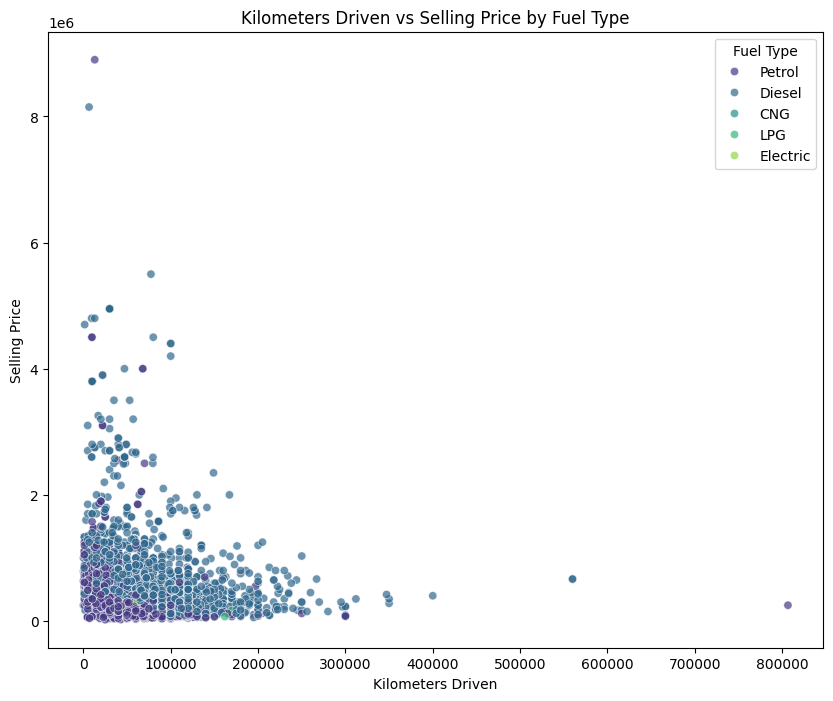

In [28]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['km_driven'], y=data['selling_price'], hue=data['fuel'], palette='viridis', alpha=0.7)
plt.title('Kilometers Driven vs Selling Price by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()


C:\Users\Main Profile\AppData\Local\Temp\ipykernel_25948\1408837470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year_group', y='selling_price', data=data, palette='coolwarm')


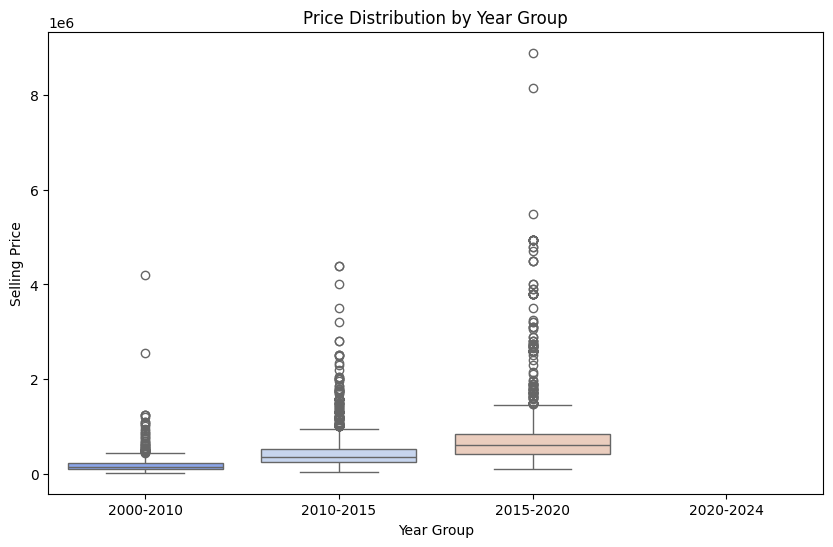

In [29]:
data['year_group'] = pd.cut(data['year'], bins=[2000, 2010, 2015, 2020, 2024], labels=['2000-2010', '2010-2015', '2015-2020', '2020-2024'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='year_group', y='selling_price', data=data, palette='coolwarm')
plt.title('Price Distribution by Year Group')
plt.xlabel('Year Group')
plt.ylabel('Selling Price')
plt.show()


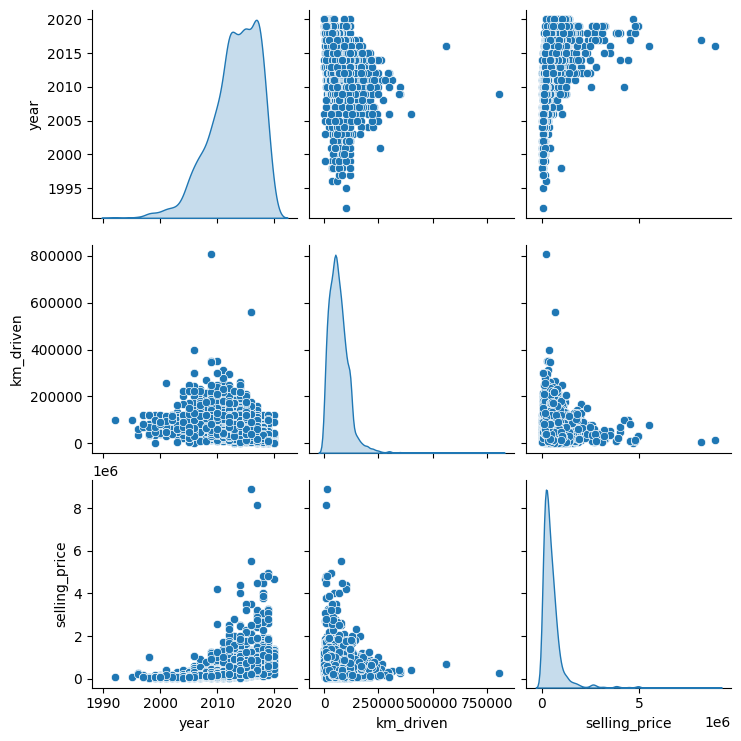

In [30]:
sns.pairplot(data[['year', 'km_driven', 'selling_price']], diag_kind='kde')
plt.show()


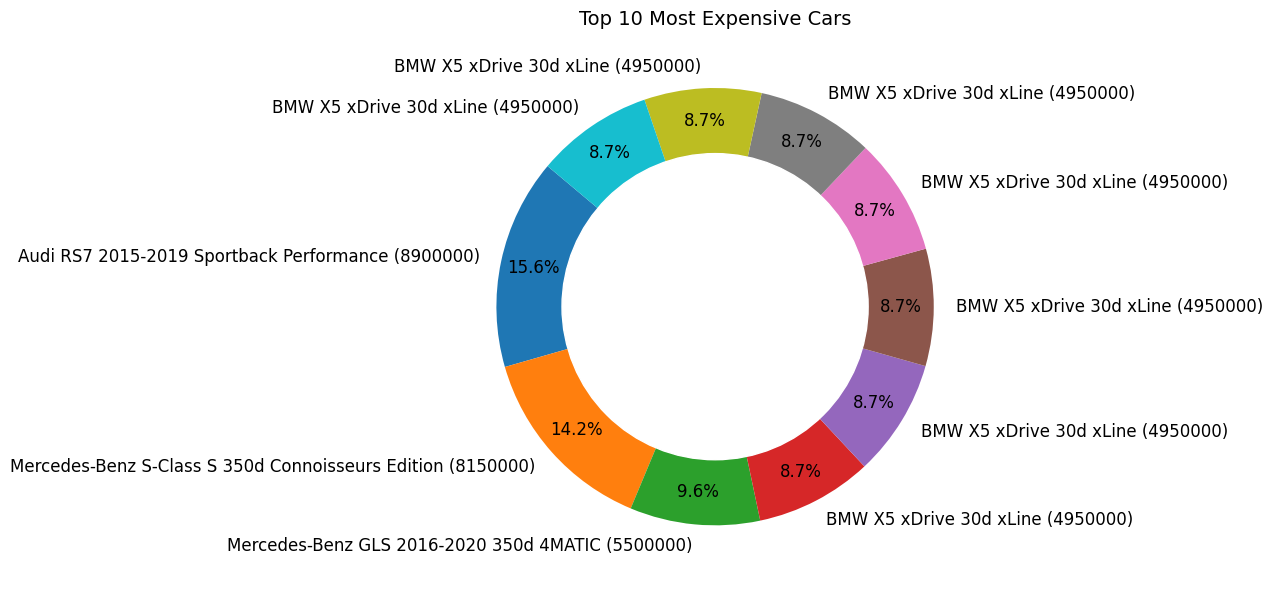

In [7]:
# Load the data (make sure your 'data' is loaded correctly)
data = pd.read_csv('car.csv')  # Replace with your actual dataset path

# Sort data by selling price and get the top 10 best cars
top_10_best_cars = data.nlargest(10, 'selling_price')

# Prepare the labels and prices for the donut chart
best_labels = top_10_best_cars['name'] + " (" + top_10_best_cars['selling_price'].astype(str) + ")"
best_prices = top_10_best_cars['selling_price']

# Create a donut chart
plt.figure(figsize=(10, 6))
plt.pie(best_prices, labels=best_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 12})
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))  # Hole in the middle for the donut shape
plt.title('Top 10 Most Expensive Cars', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

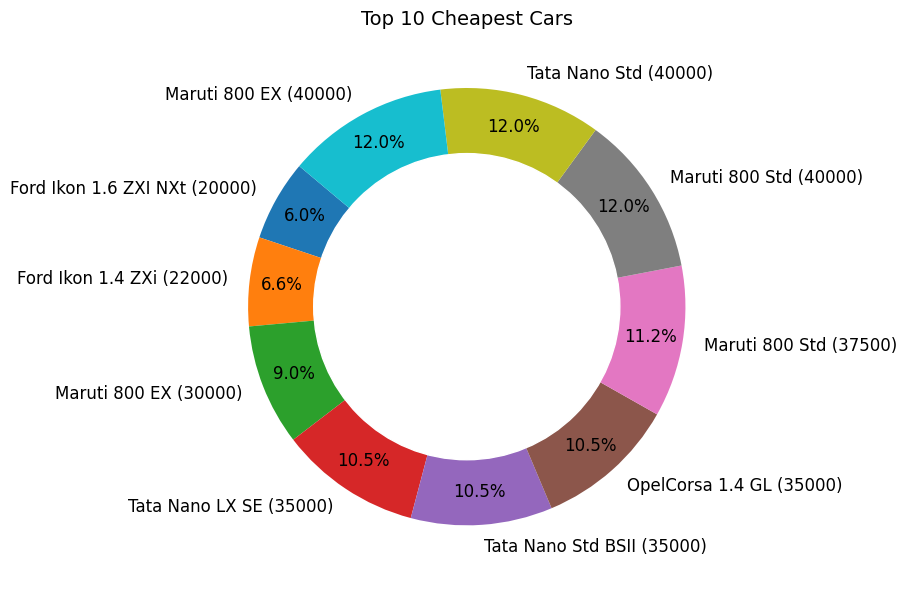

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (make sure your 'data' is loaded correctly)
data = pd.read_csv('car.csv')  # Replace with your actual dataset path

# Sort data by selling price and get the bottom 10 worst cars (lowest price)
bottom_10_worst_cars = data.nsmallest(10, 'selling_price')

# Prepare the labels and prices for the donut chart
worst_labels = bottom_10_worst_cars['name'] + " (" + bottom_10_worst_cars['selling_price'].astype(str) + ")"
worst_prices = bottom_10_worst_cars['selling_price']

# Create a donut chart
plt.figure(figsize=(10, 6))
plt.pie(worst_prices, labels=worst_labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, textprops={'fontsize': 12})
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))  # Hole in the middle for the donut shape
plt.title('Top 10 Cheapest Cars', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [8]:
from tabulate import tabulate  # Ensure you install this library with `pip install tabulate`

def filter_cars_by_price(min_price, max_price):
    """
    Filters cars in the dataset within the specified price range and displays results in a well-formatted table.
    """
    # Filter the cars
    filtered_cars = data[(data['selling_price'] >= min_price) & (data['selling_price'] <= max_price)]
    
    if filtered_cars.empty:
        print(f"No cars found in the price range {min_price}-{max_price}.")
    else:
        print(f"Cars available in the price range {min_price}-{max_price}:\n")
        
        # Select specific columns for better readability
        display_columns = ['name', 'year', 'km_driven', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner']
        filtered_data = filtered_cars[display_columns]
        
        # Using 'grid' style with adjusted formatting for better readability
        table = tabulate(filtered_data, headers=display_columns, tablefmt='grid', showindex=False)

        # Print the formatted table
        print(table)

# Example usage:
min_price = float(input("Enter minimum price: "))
max_price = float(input("Enter maximum price: "))
filter_cars_by_price(min_price, max_price)


Enter minimum price: 200000
Enter maximum price: 300000
Cars available in the price range 200000.0-300000.0:

+-----------------------------------------------+--------+-------------+-----------------+--------+------------------+----------------+----------------------+
| name                                          |   year |   km_driven |   selling_price | fuel   | seller_type      | transmission   | owner                |
+===============================================+========+=============+=================+========+==================+================+======================+
| Datsun RediGO T Option                        |   2017 |       46000 |          250000 | Petrol | Individual       | Manual         | First Owner          |
+-----------------------------------------------+--------+-------------+-----------------+--------+------------------+----------------+----------------------+
| Tata Indigo Grand Petrol                      |   2014 |       60000 |          240000 | Petr